In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from itertools import combinations

In [2]:
red_wine_path = "./Resources/winequality-red.csv"
white_wine_path = "./Resources/winequality-white.csv"

In [3]:
red_df = pd.read_csv(red_wine_path,sep=";")
white_df = pd.read_csv(white_wine_path,sep=";")

In [4]:
display(red_df.shape)
display(white_df.shape)
display(red_df.head(2))
display(white_df.head(2))

(1599, 12)

(4898, 12)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6

In [5]:
red_df["wine type"] = "red"
white_df["wine type"] = "white"

In [6]:
ori_df = pd.concat([red_df, white_df], ignore_index = True)

In [7]:
display(ori_df.head(2))
display(ori_df.tail(2))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality wine type  
0      9.4        5       red  
1      9.8        5       red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine type  
6495     12.8        7     white  
6496     11.8        6     white

In [8]:
# create a copy of ori_df for future questions
df = ori_df.copy()

---

In [9]:
# clean dataset
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine type               0
dtype: int64

In [11]:
# view some sample of duplicated values
df[df.duplicated(keep=False)].loc[[0,4,9,11,6454,6455]]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.70         0.00             1.9      0.076   
9               7.5              0.50         0.36             6.1      0.071   
11              7.5              0.50         0.36             6.1      0.071   
6454            7.1              0.23         0.39            13.7      0.058   
6455            7.1              0.23         0.39            13.7      0.058   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
9                    17.0                 102.0  0.99780  3.35       0.80   
11                   17.0                 102.0  0.99780  3.35       0.80   
6454                 26.0                 172.0  0.99755  2.90       0.46   
6455                 26.0                 172.0  0.99755  2.90       0.46   

      alcohol  quality wine type  
0         9.4        5       red  
4         9.4        5       red  
9        10.5        5       red  
11       10.5        5       red  
6454      9.0        6     white  
6455      9.0        6     white

In [13]:
# totally 1177 duplicated values
df.duplicated().sum()

1177

In [14]:
df = df.drop_duplicates()\
       .reset_index(drop = True)

In [15]:
display(df.shape)
display(df.duplicated().sum())
display(df.head(2))
display(df.tail(2))

(5320, 13)

0

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality wine type  
0      9.4        5       red  
1      9.8        5       red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine type  
5318     12.8        7     white  
5319     11.8        6     white

# 1.1 Summary Statistics
Compute and display summary statistics for each feature available in the dataset. These must include 1) minimum value, 2) maximum value, 3) mean, 4) range, 5) standard deviation, 6) variance, 7) count, 8) 25:50:75 percentiles.



In [87]:
df_numeric = df.select_dtypes(exclude = "object")
            
summary_wine = df_numeric.describe().T

In [88]:
summary_wine["variance"] = df_numeric.var()

summary_wine["range"] = summary_wine["min"].map('[{:>,.2f}'.format) +\
                        ", " + summary_wine["max"].map('{:>6,.2f}]'.format)

summary_wine["count"] = summary_wine["count"].map(int)

summary_wine.iloc[:, 1:9] = summary_wine.iloc[:, 1:9].applymap('{:.3f}'.format)


In [89]:
summary_wine.iloc[:, [3,7,1,9,2,8,0,4,5,6]]

min      max     mean           range     std  \
fixed acidity         3.800   15.900    7.215  [3.80,  15.90]   1.320   
volatile acidity      0.080    1.580    0.344  [0.08,   1.58]   0.168   
citric acid           0.000    1.660    0.318  [0.00,   1.66]   0.147   
residual sugar        0.600   65.800    5.048  [0.60,  65.80]   4.500   
chlorides             0.009    0.611    0.057  [0.01,   0.61]   0.037   
free sulfur dioxide   1.000  289.000   30.037  [1.00, 289.00]  17.805   
total sulfur dioxide  6.000  440.000  114.109  [6.00, 440.00]  56.774   
density               0.987    1.039    0.995  [0.99,   1.04]   0.003   
pH                    2.720    4.010    3.225  [2.72,   4.01]   0.160   
sulphates             0.220    2.000    0.533  [0.22,   2.00]   0.150   
alcohol               8.000   14.900   10.549  [8.00,  14.90]   1.186   
quality               3.000    9.000    5.796  [3.00,   9.00]   0.880   

                      variance  count     25%      50%      75%  
fixed acidity            1.742   5320   6.400    7.000    7.700  
volatile acidity         0.028   5320   0.230    0.300    0.410  
citric acid              0.022   5320   0.240    0.310    0.400  
residual sugar          20.252   5320   1.800    2.700    7.500  
chlorides                0.001   5320   0.038    0.047    0.066  
free sulfur dioxide    317.020   5320  16.000   28.000   41.000  
total sulfur dioxide  3223.312   5320  74.000  116.000  153.250  
density                  0.000   5320   0.992    0.995    0.997  
pH                       0.026   5320   3.110    3.210    3.330  
sulphates                0.022   5320   0.430    0.510    0.600  
alcohol                  1.406   5320   9.500   10.400   11.400  
quality                  0.774   5320   5.000    6.000    6.000

# 1.2 Data Visualization

Histograms: To illustrate the feature distributions, create a histogram for each feature in the dataset. You may plot each histogram individually or combine them all into a single plot. When generating histograms for this assignment, use the default number of bins. Recall that a histogram provides a graphical representation of the distribution of the data.

In [93]:
df.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality wine type  
0      9.4        5       red  
1      9.8        5       red  
2      9.8        5       red

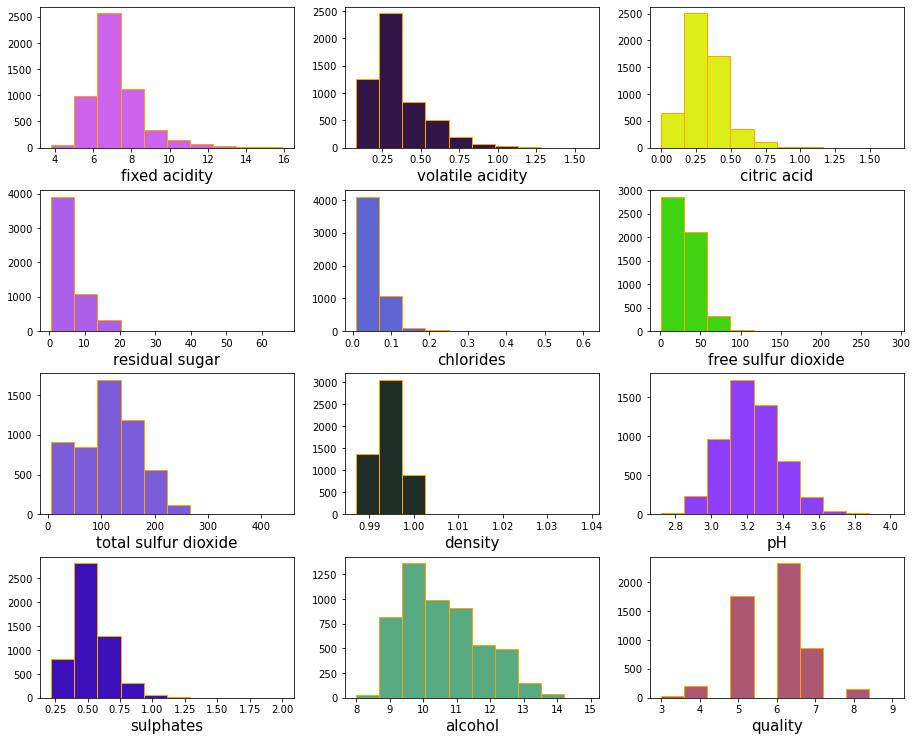

In [254]:
fig, axs = plt.subplots(4,3, figsize = (15,12))
plt.subplots_adjust(left=0.1,right=0.9, top=0.9, bottom=0.1, 
                    wspace=0.2, hspace=0.3) #location matters
#fig.tight_layout(pad = 3)
for i in range(len(df.columns) -1):
    axs[i//3, i % 3].hist(df[df.columns[i]], edgecolor = "orange",
                          color = "#" + "".join(random.choices("123456789ABCDEF",k=6)))
    axs[i//3, i % 3].set_xlabel(df.columns[i], fontsize = 15)
    
    

## Box plots

<AxesSubplot:>

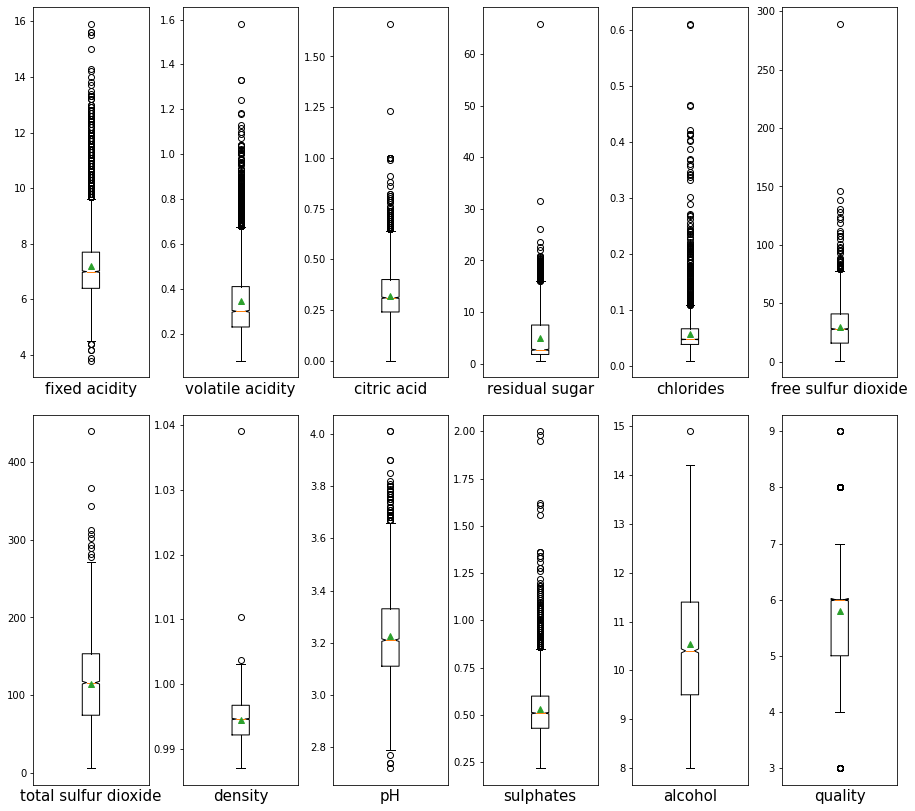

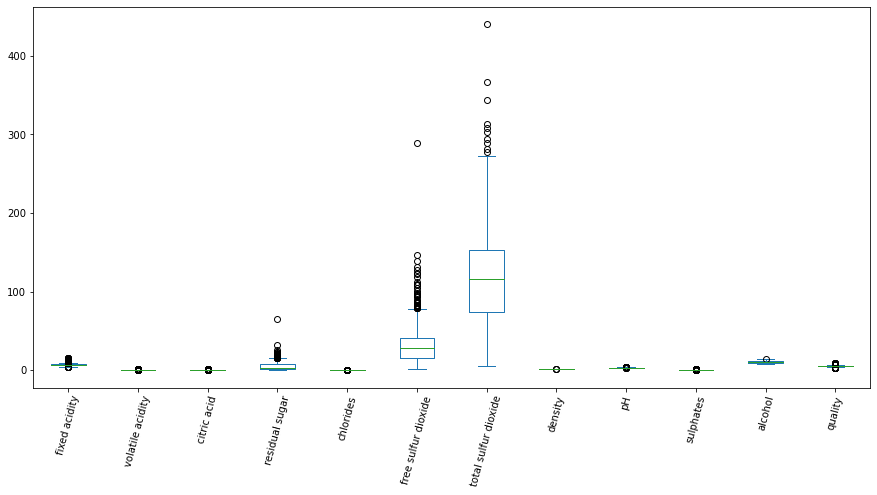

In [331]:
fig, axs = plt.subplots(2,6, figsize = (15,12))
plt.subplots_adjust(left=0.1,right=0.9, top=1, bottom=0.1, 
                    wspace=0.3, hspace=0.1) #location matters
#fig.tight_layout(pad = 3)
for i in range(len(df.columns) -1):
    axs[i//6, i % 6].boxplot(df[df.columns[i]], showmeans = True, notch = True)
    axs[i//6, i % 6].set_xlabel(df.columns[i], fontsize =15)
    axs[i//6, i % 6].set_xticks([]) 
df.plot(kind = "box", figsize = (15,7), rot=75)

In [284]:
def my_pairplot(datadf, target_col, other_col):
    """
    This function select a target column and then plot the scatter plot
    between target column and other columns
    param: 
        datadf:dataframe
        target_col:int
        other_col:list
    """
    fig, axs = plt.subplots(4,3, figsize = (15,12))
    plt.subplots_adjust(left=0.1,right=0.9, top=0.9, bottom=0.1, 
                        wspace=0.3, hspace=0.3)
    
    for i in range(0, 12):
        if i == target_col:
            axs[i//3,i%3].hist(datadf.iloc[:, target_col], bins = 30, color = "blue", edgecolor = "orange")
            axs[i//3,i%3].set_xlabel(datadf.columns[target_col], fontsize = 15)
        #axs[i//3, i % 3 + 1] = sns.regplot(x = df.iloc[:, 0], y = df.iloc[:, i])
        else:
            sns.regplot(x = datadf.iloc[:, target_col], y = df.iloc[:, i], ax = axs[i//3, i % 3],
                        line_kws = {"color": "orange"}, 
                        color = "#" + "".join(random.choices("123456789ABCDEF",k=6)))
            axs[i//3, i % 3].set_xlabel(datadf.columns[target_col], fontsize = 15)
            axs[i//3, i % 3].set_ylabel(datadf.columns[i], fontsize = 15)


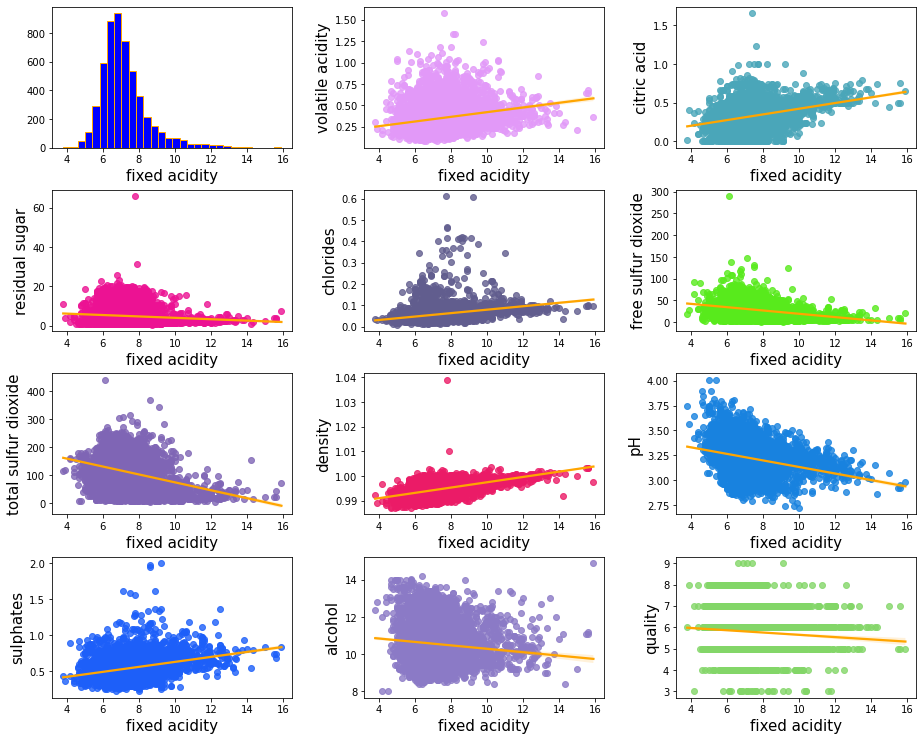

In [285]:
my_pairplot(df, 0, list(range(12)).pop(0))

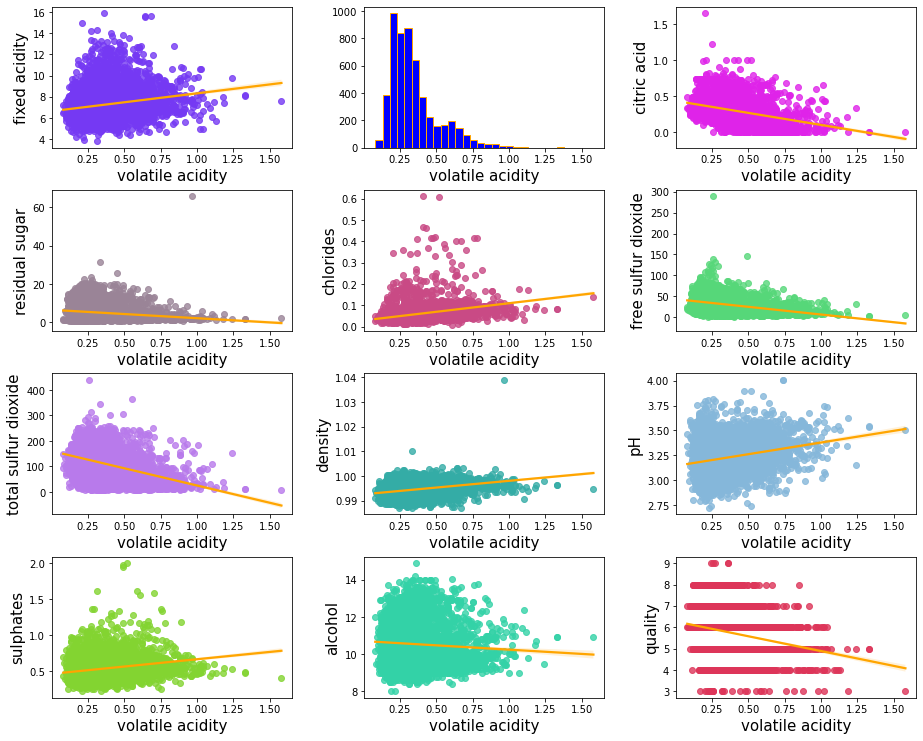

In [286]:
my_pairplot(df, 1, list(range(12)).pop(1))

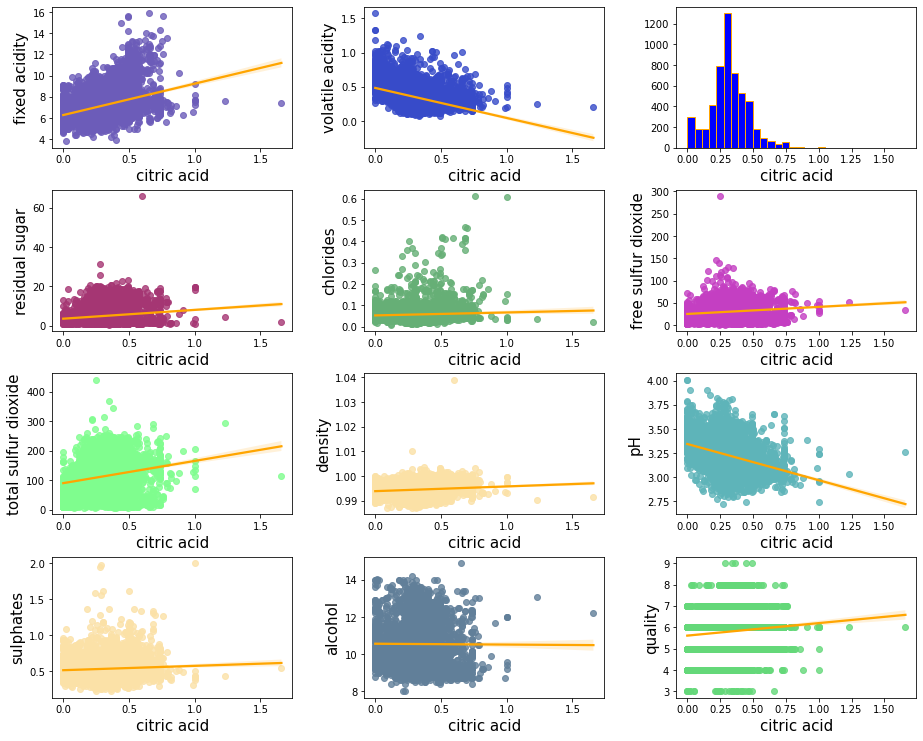

In [287]:
my_pairplot(df, 2, list(range(12)).pop(2))

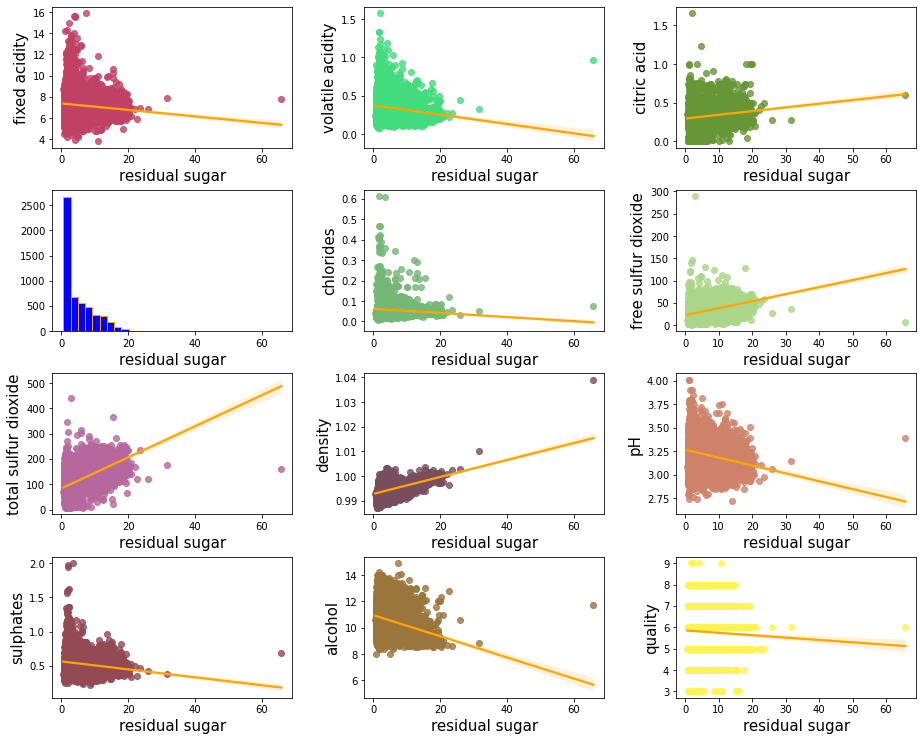

In [288]:
my_pairplot(df, 3, list(range(12)).pop(3))

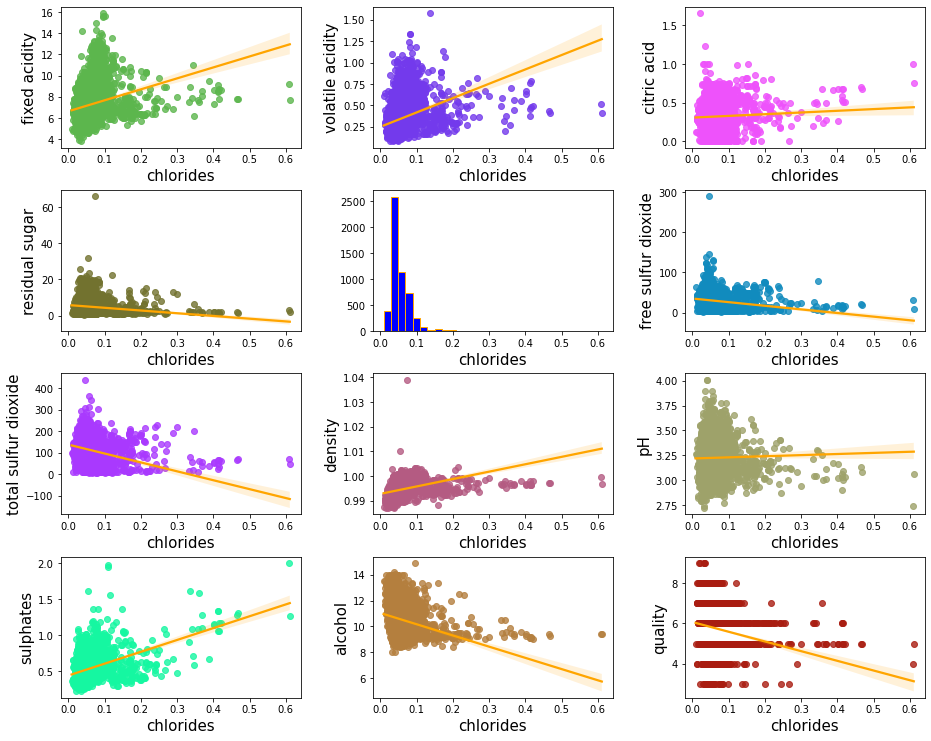

In [289]:
my_pairplot(df, 4, list(range(12)).pop(4))

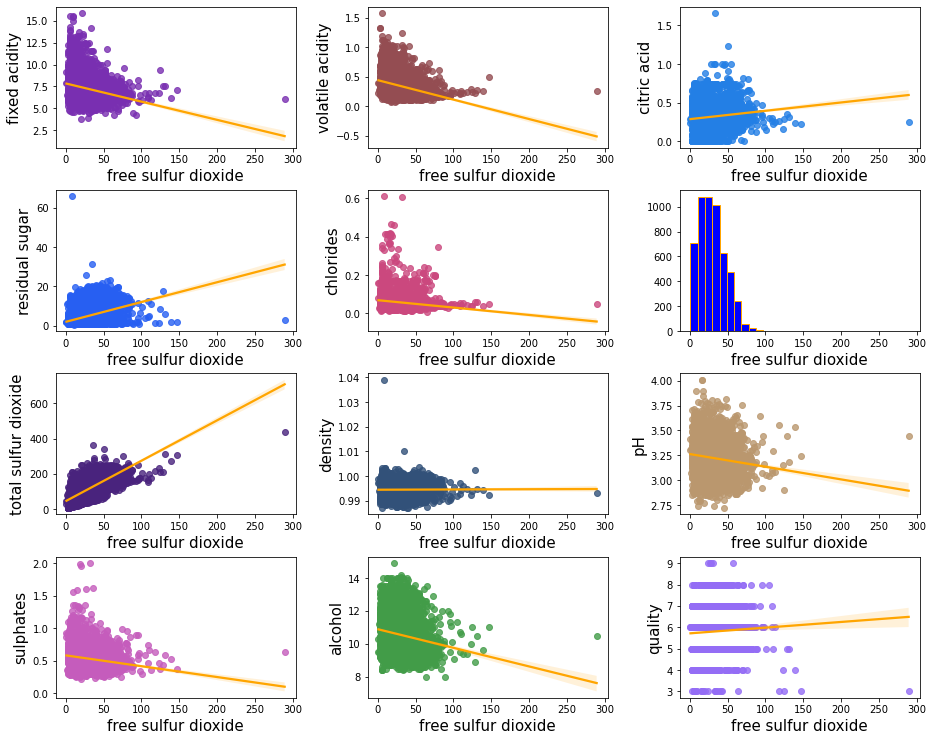

In [290]:
my_pairplot(df, 5, list(range(12)).pop(5))

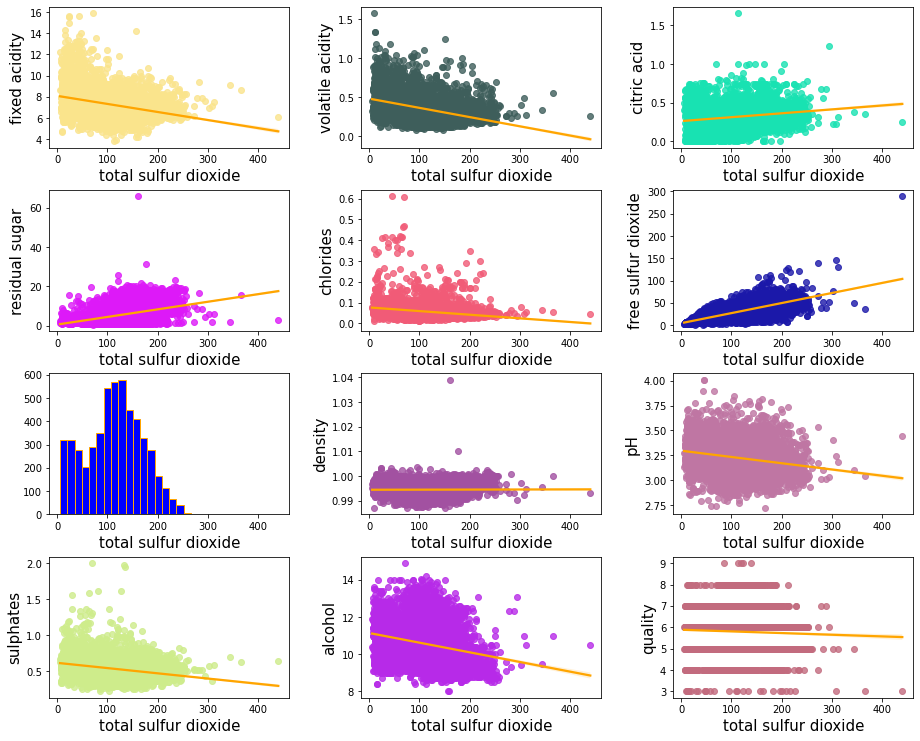

In [291]:
my_pairplot(df, 6, list(range(12)).pop(6))

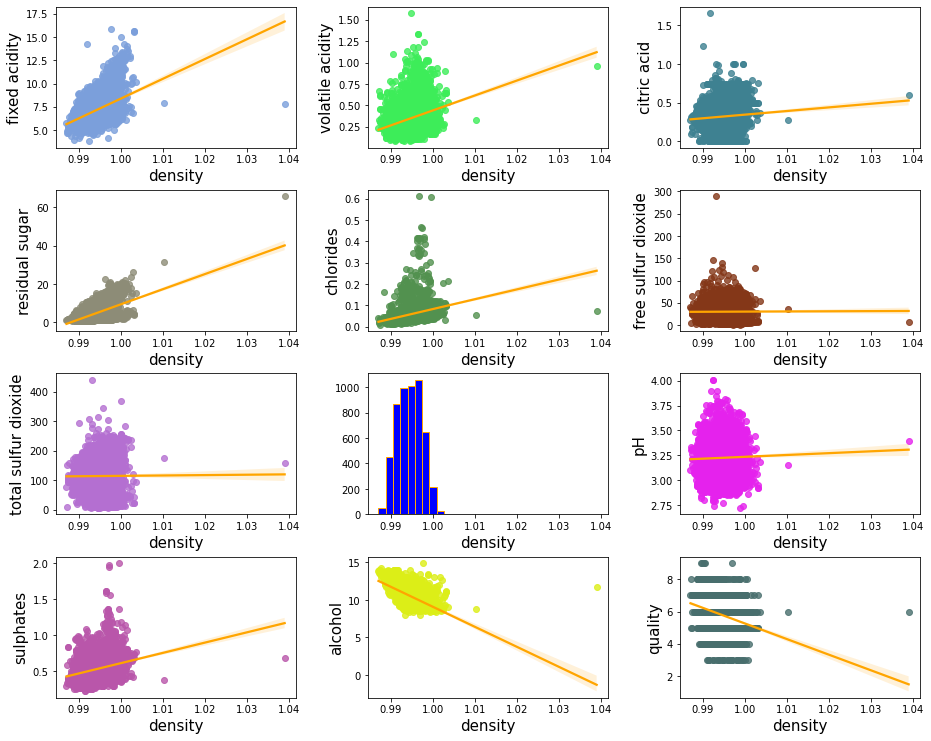

In [292]:
my_pairplot(df, 7, list(range(12)).pop(7))

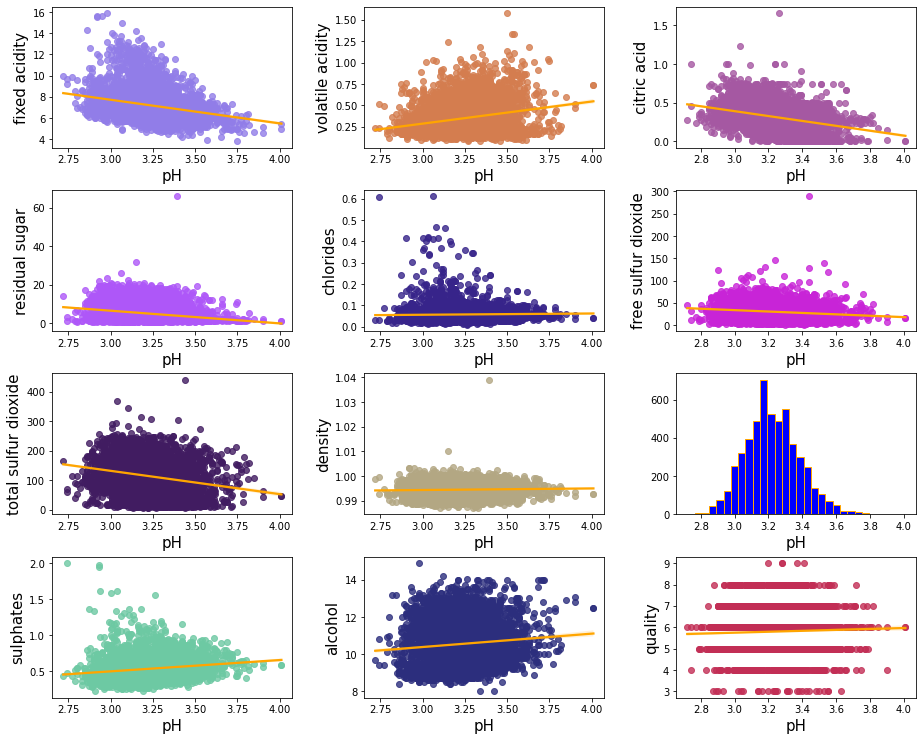

In [293]:
my_pairplot(df, 8, list(range(12)).pop(8))

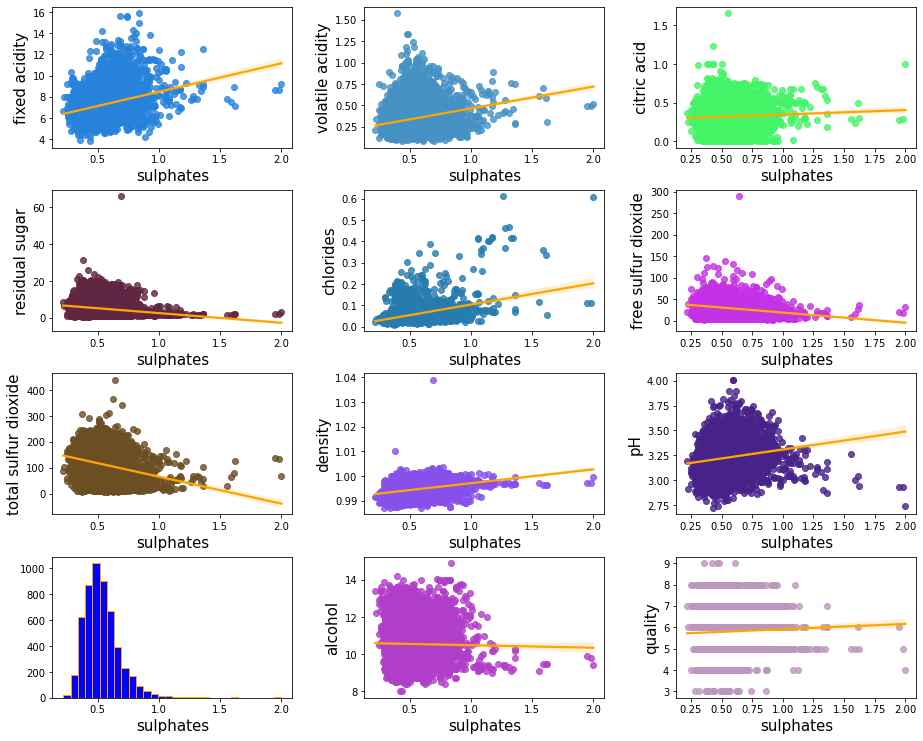

In [294]:
my_pairplot(df, 9, list(range(12)).pop(9))

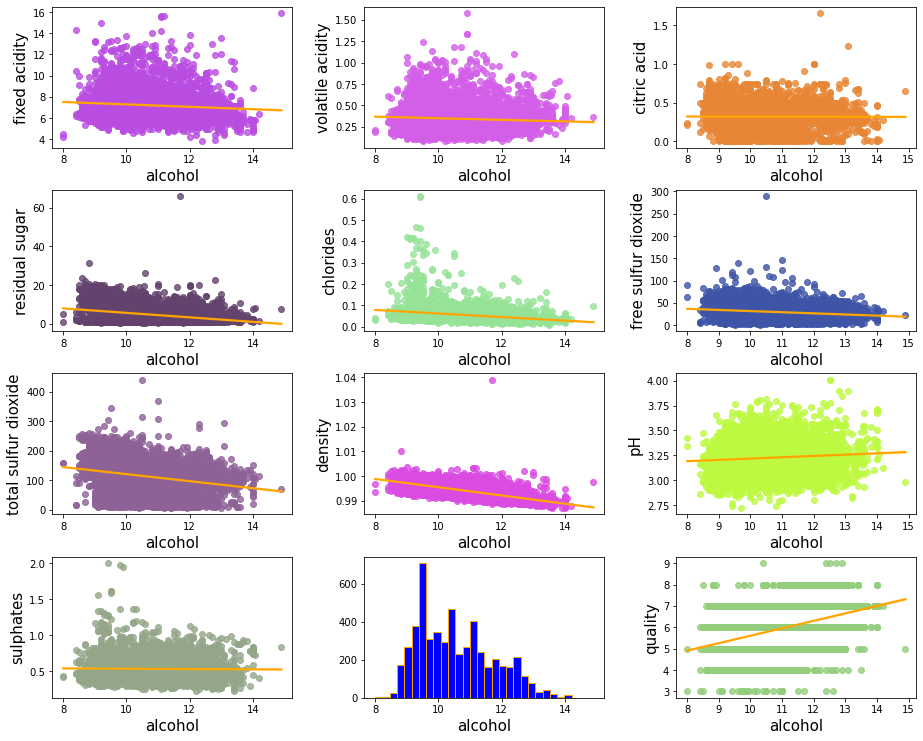

In [295]:
my_pairplot(df, 10, list(range(12)).pop(10))

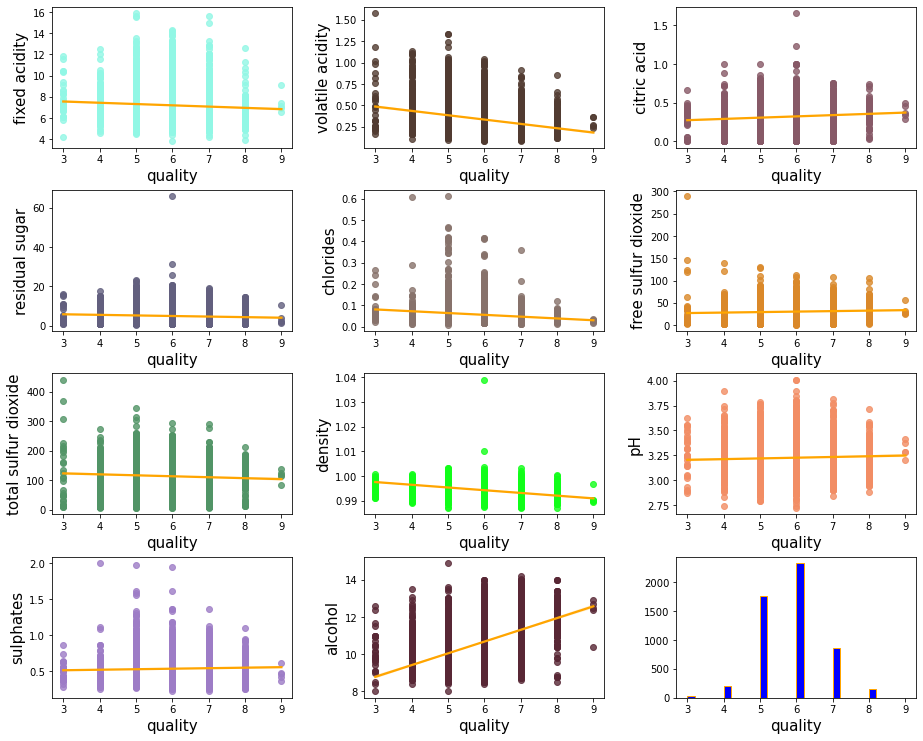

In [296]:
my_pairplot(df, 11, list(range(12)).pop(11))

# here is a combination of all the above plot

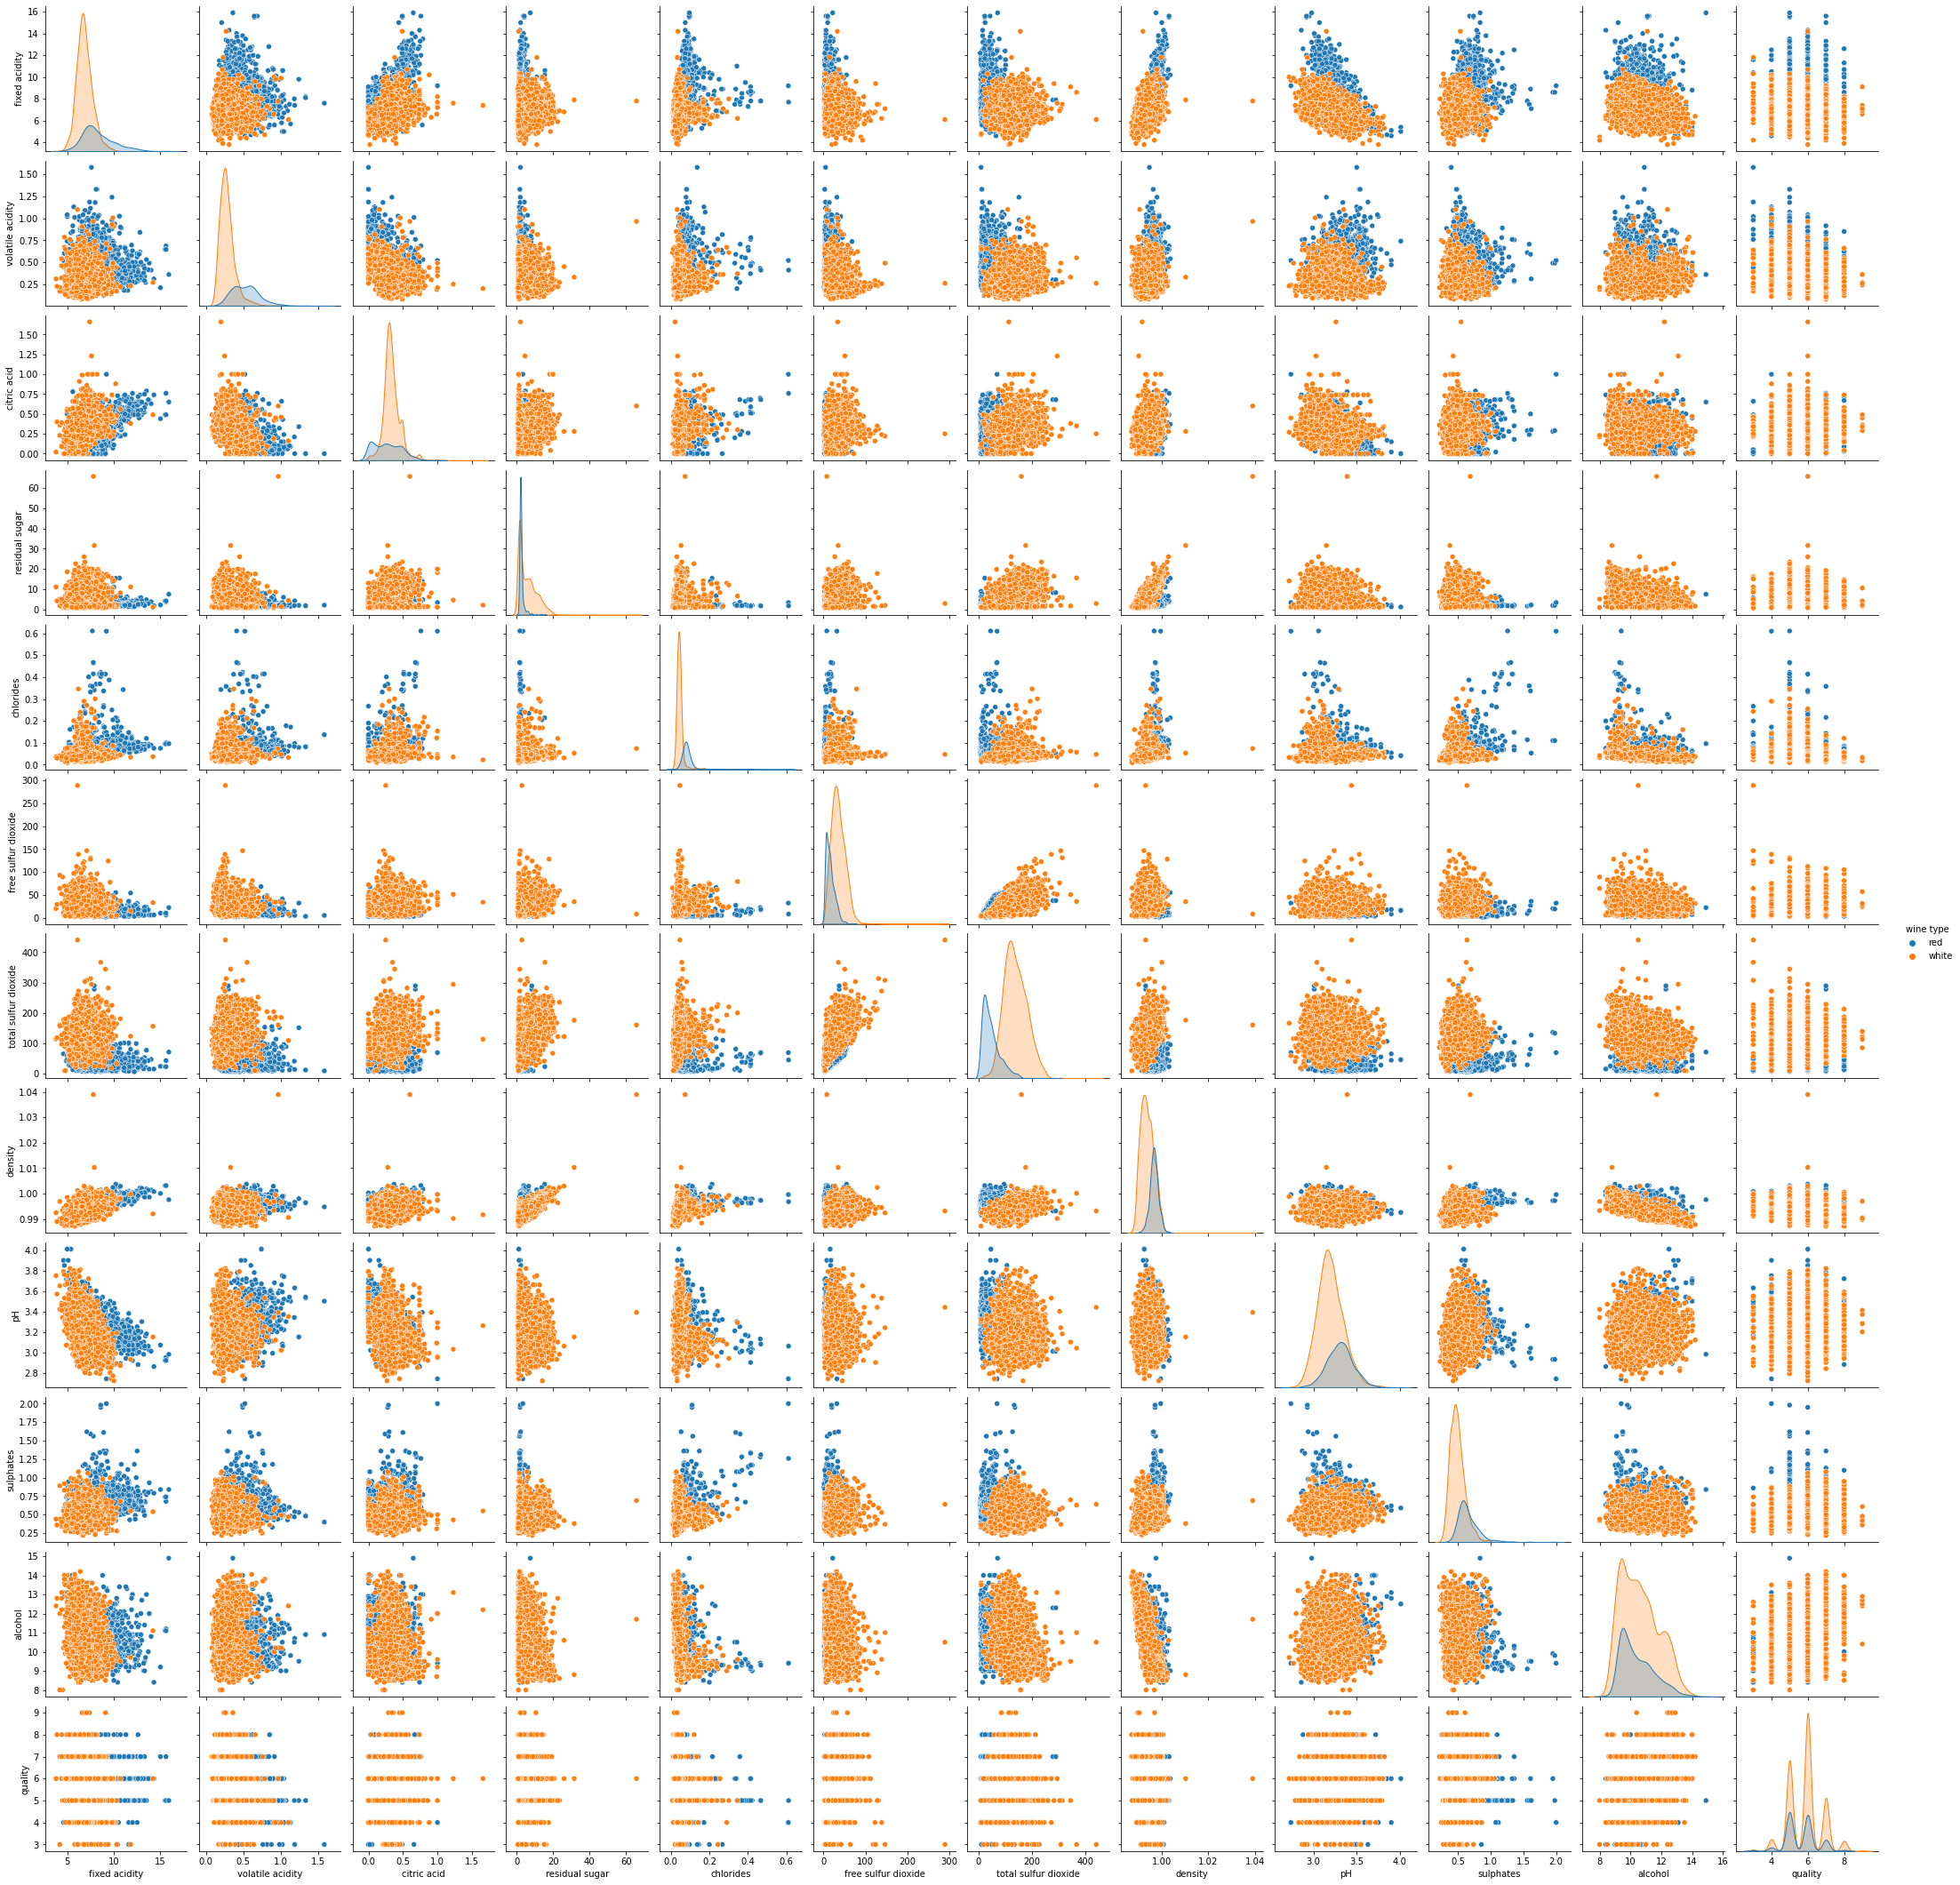

In [301]:
sns.pairplot(df, hue = "wine type")

## Class-wise_visualization
Create pairwise plots for each pair of features in a similar way for each of the different classes present in the data.

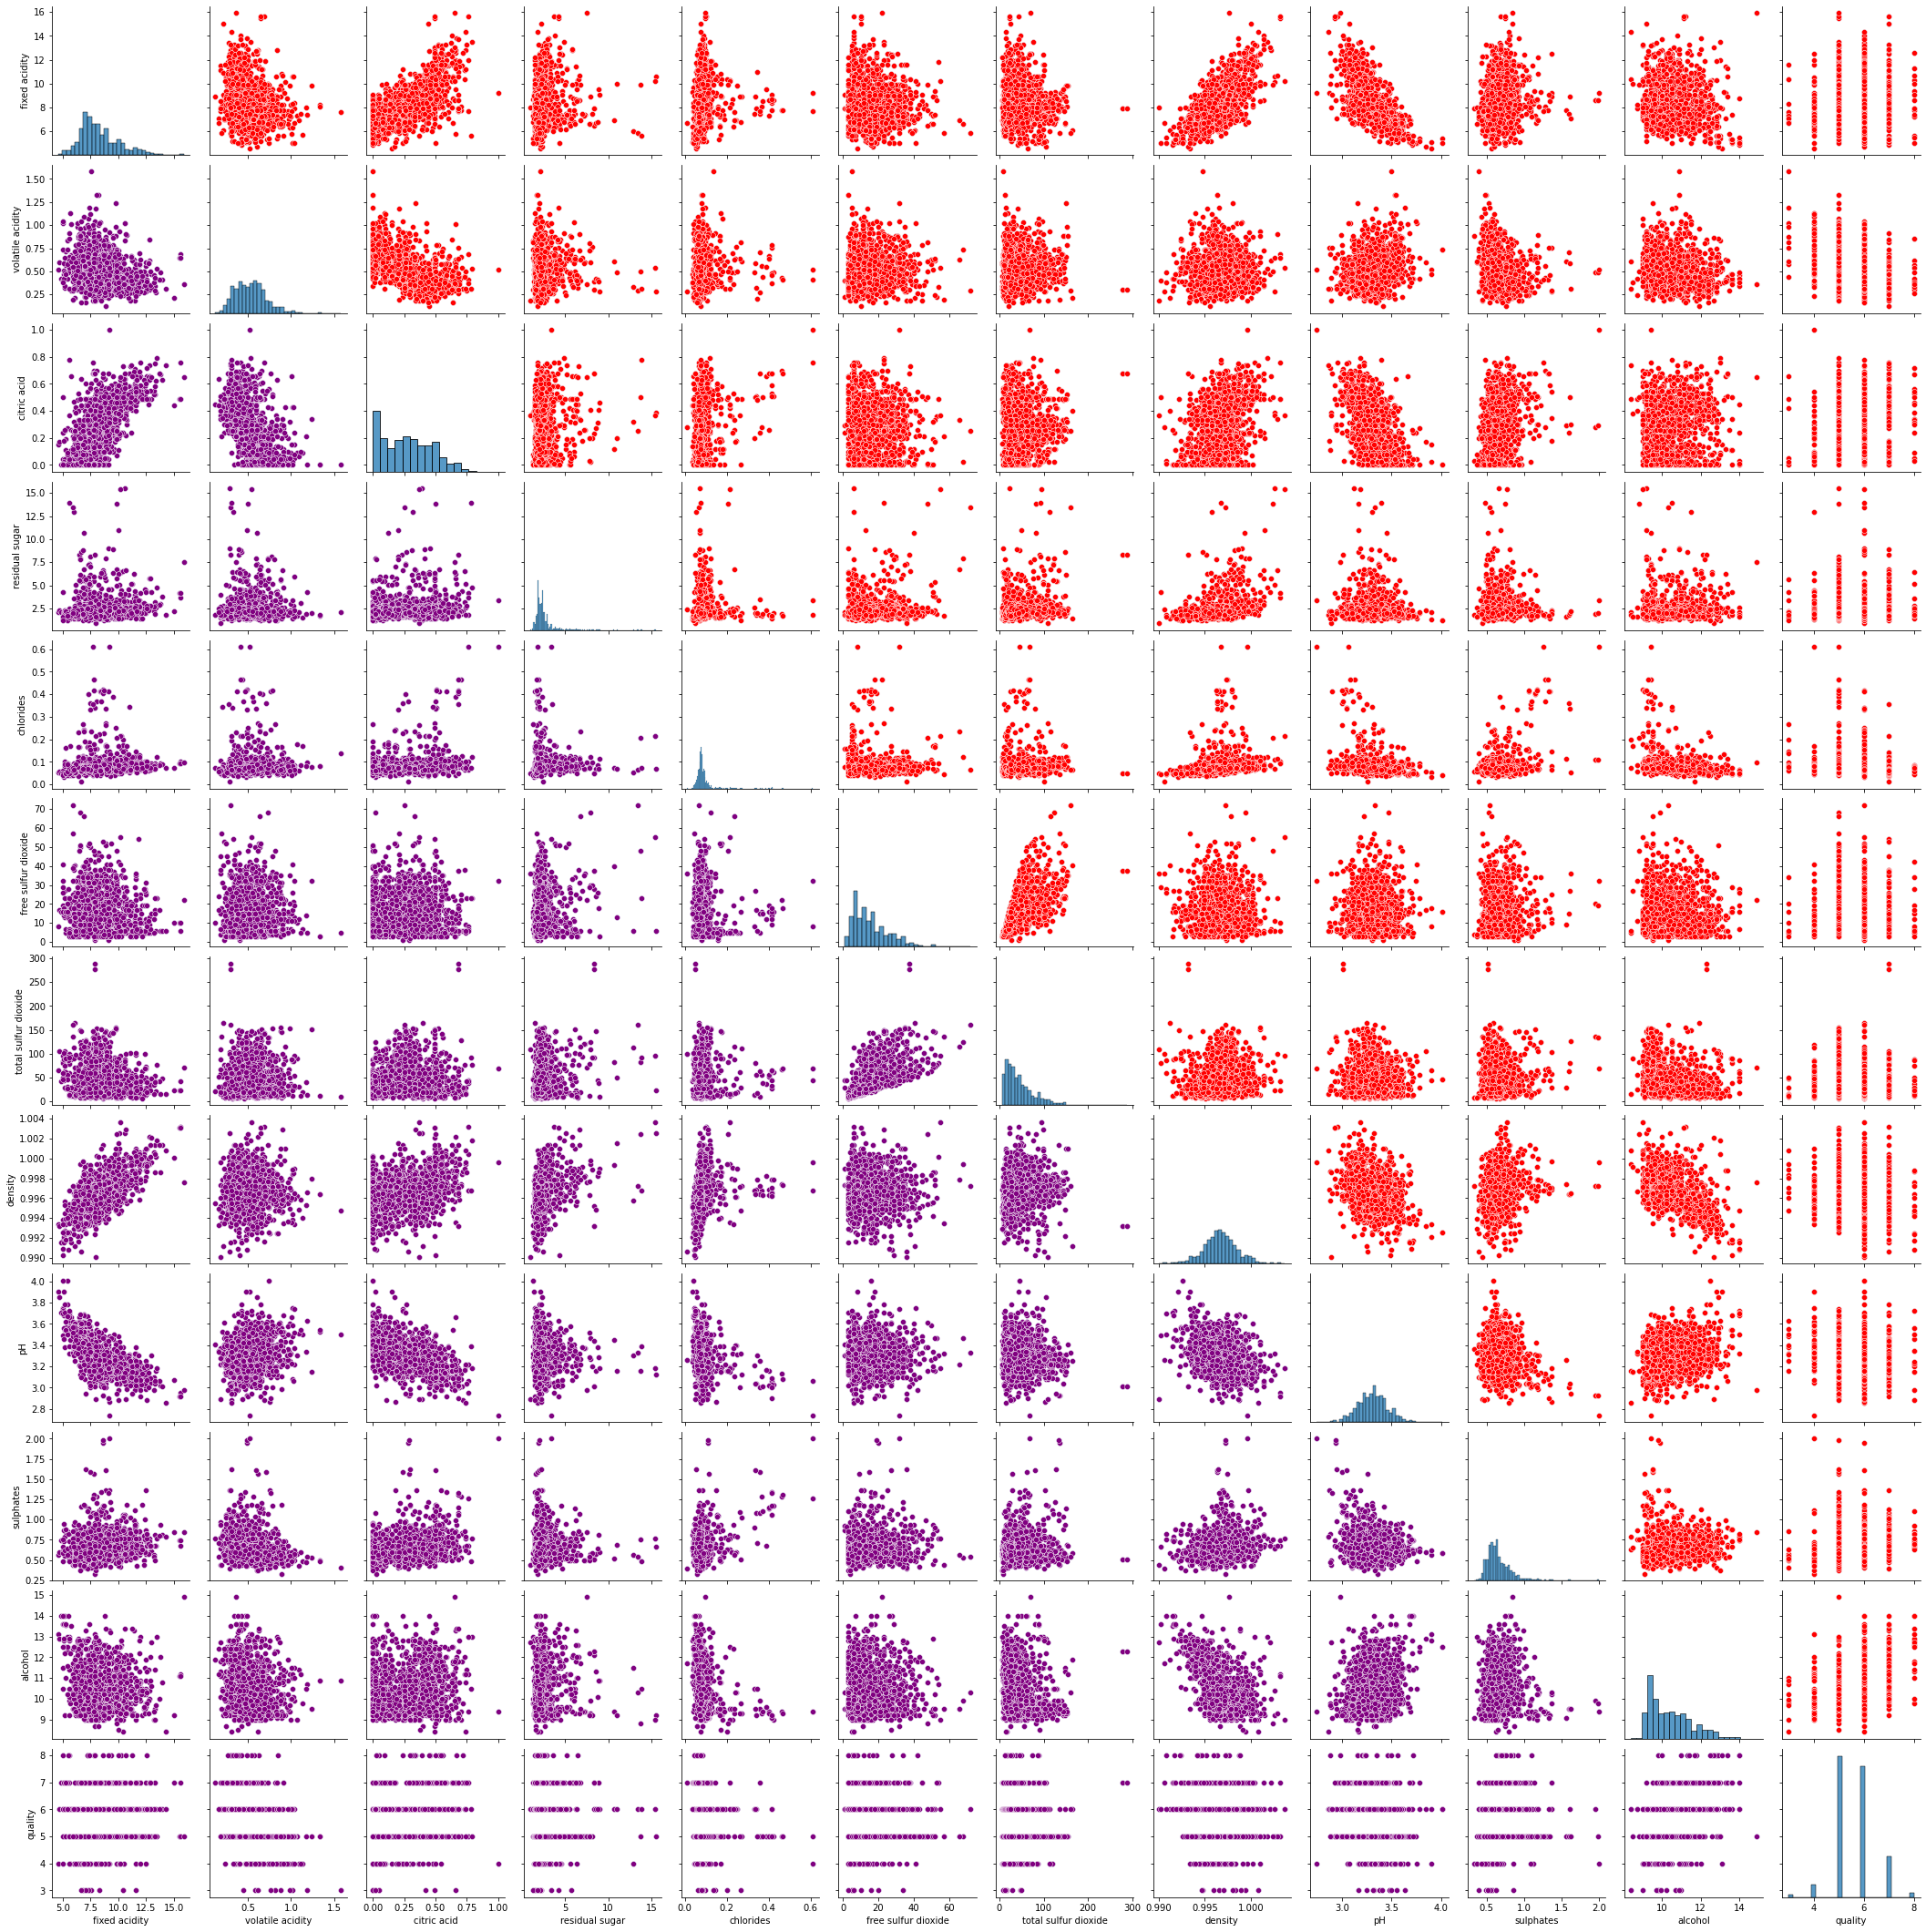

In [306]:
# red wine class
plots = sns.pairplot(df[df["wine type"] == "red"])
plots.map_upper(sns.scatterplot, color = "red")
plots.map_lower(sns.scatterplot, color = "purple")

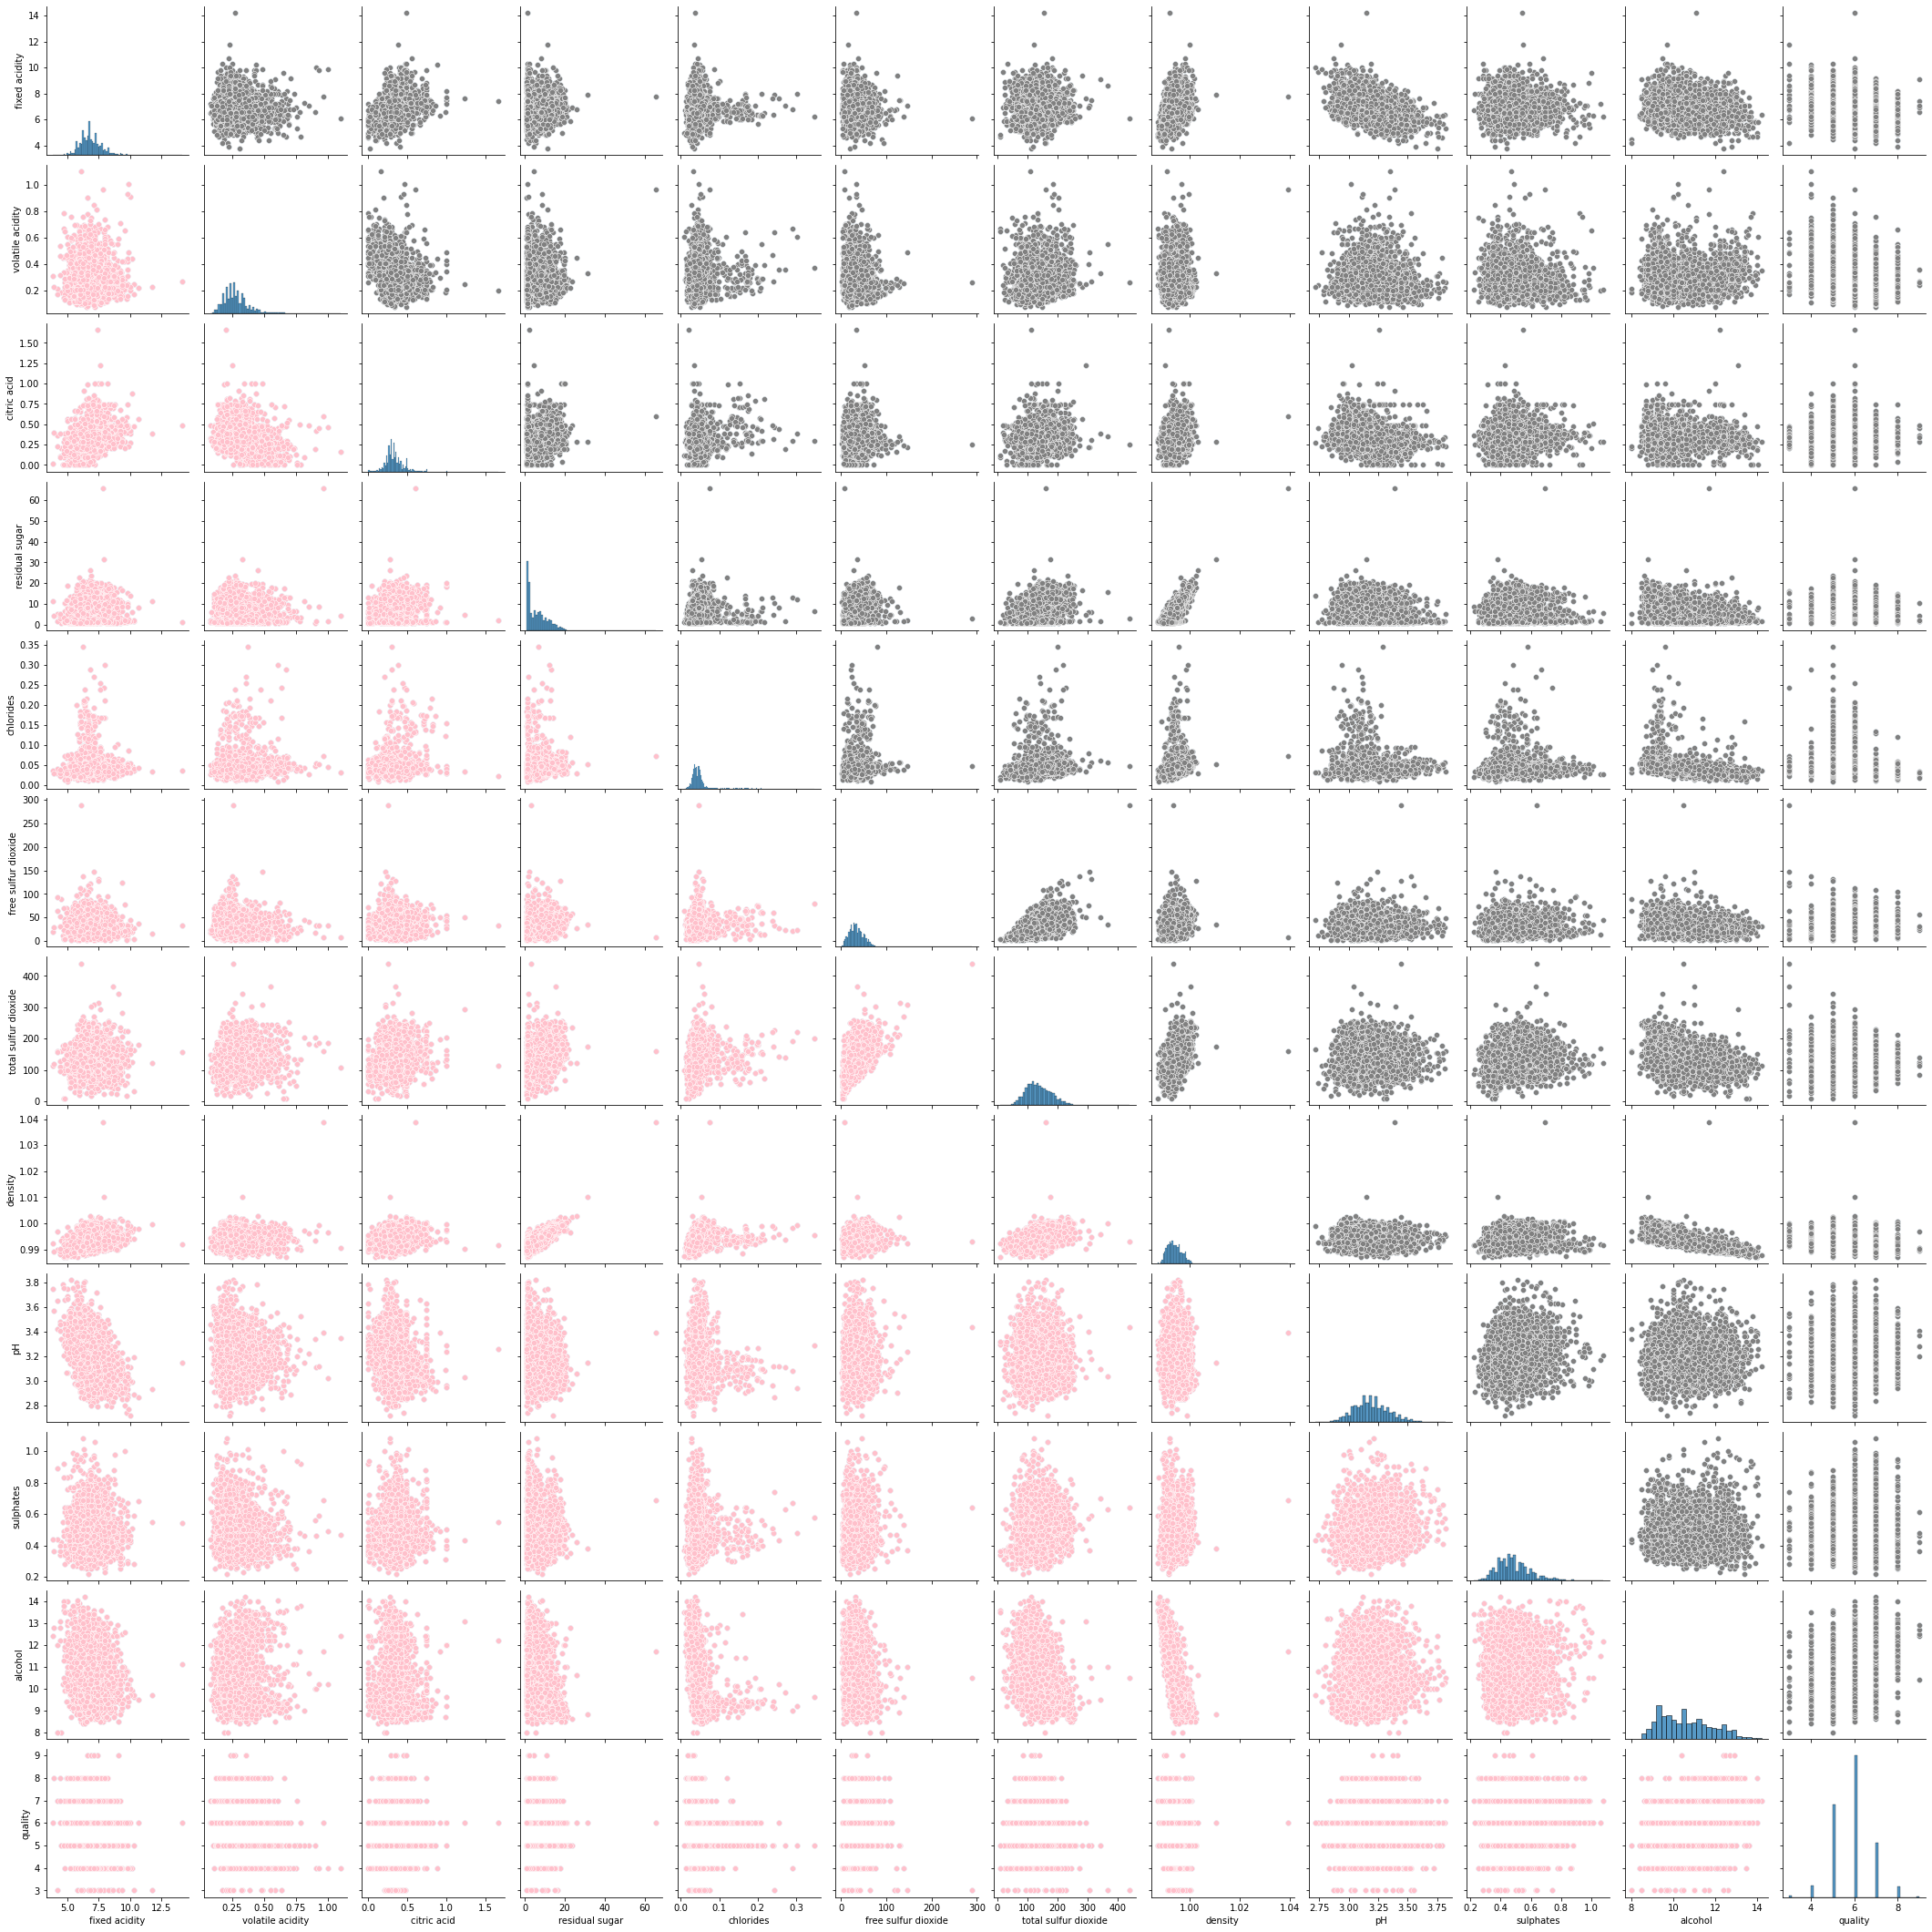

In [310]:
# white wine
plots = sns.pairplot(df[df["wine type"] == "white"])
plots.map_upper(sns.scatterplot, color = "gray")
plots.map_lower(sns.scatterplot, color = "Pink")

# 1.3 Conceptual Questions
Answer the following questions about the analysis you just performed. Include the answers to these questions as text content (using markdown or text cells on Jupyter notebook) in the same notebook file used for visualization.


In [311]:
df.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality wine type  
0      9.4        5       red  
1      9.8        5       red

1. How many features are there? What are the types of the features (e.g., numeric, nominal, discrete, continuous)?
> * there are totally 11 features from the origianl dataset
> * newly added wine type is exclusive in this question
> * quantity is considered as label in this dataset
> * all the features are continuous data while labels are discrete, newly added winetype is nominal data

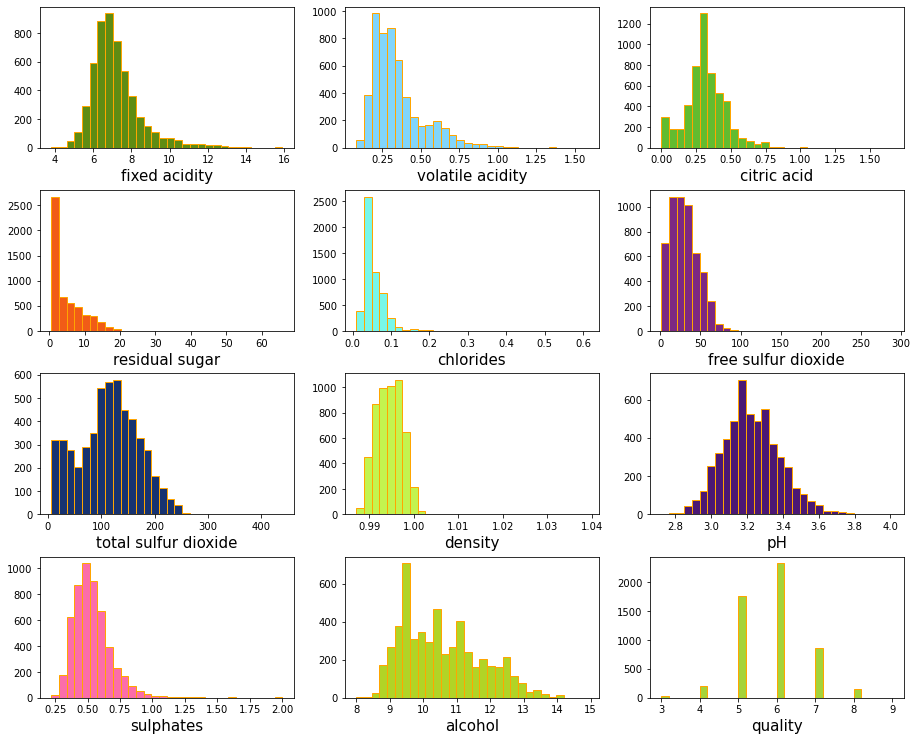

In [326]:
fig, axs = plt.subplots(4,3, figsize = (15,12))
plt.subplots_adjust(left=0.1,right=0.9, top=0.9, bottom=0.1, 
                    wspace=0.2, hspace=0.3) #location matters
#fig.tight_layout(pad = 3)
for i in range(len(df.columns) -1):
    axs[i//3, i % 3].hist(df[df.columns[i]], bins = 30 ,edgecolor = "orange",
                          color = "#" + "".join(random.choices("123456789ABCDEF",k=6)))
    axs[i//3, i % 3].set_xlabel(df.columns[i], fontsize = 15)
    

2. What can you conclude from the histograms about the distribution of the features in the dataset? Are there any features that are approximately normally distributed? Are there any features that are highly skewed
> * `PH` feature are approximately normally distributed
> * other features except `PH` are right skewed
> * label `quality` is not continues data

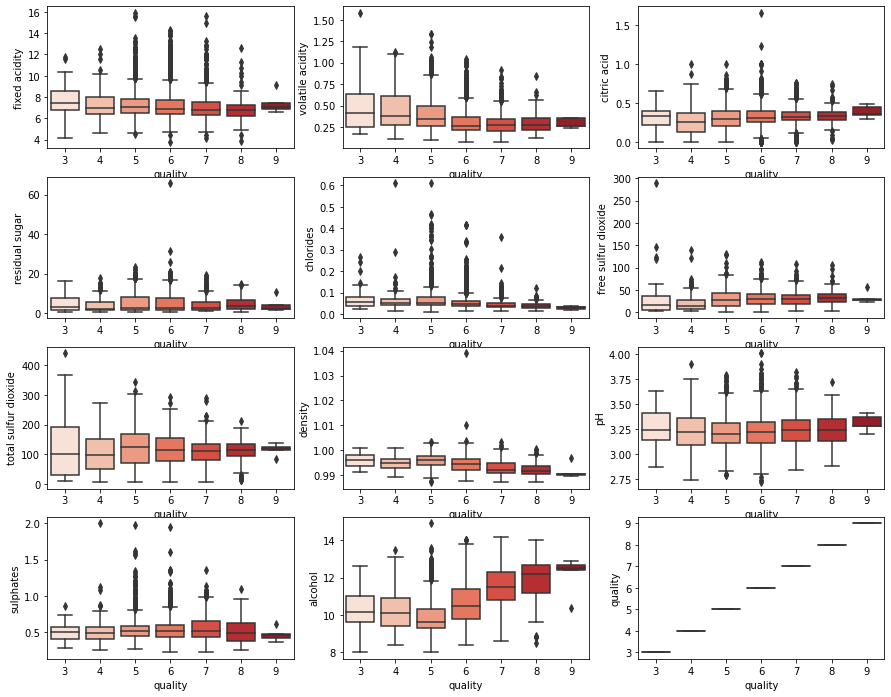

In [355]:
fig, axs = plt.subplots(4,3, figsize = (15,12))
for i in range(12):
    sns.boxplot(x = df["quality"], y = df.iloc[:, i],
                  palette = "Reds", ax = axs[i//3, i%3])

3. Based on the box plots, are there any features that appear to have many outliers? Are there any features that appear to have a similar spread of values across different quality ratings? Are there any features that appear to have different spreads of values across different quality ratings?
> * `fixed acidity`, `volatile acidity`, `citric acid`, `residual suger`, `chlorides`, `free sulfur dioxide`, `PH`, `sulphates` have many outliers
> * `fixed acidity`,  `citric acid`, `residual sugar`,
    `chlorides`, `free sulfur dioxide`, `density`,
     `pH`, `sulphates`, has similar spread of values across quality ratings
> *  `volatile acidity`,`total sulfur dioxide`,`alcohol` have different spreads of values across quality ratings

<AxesSubplot:>

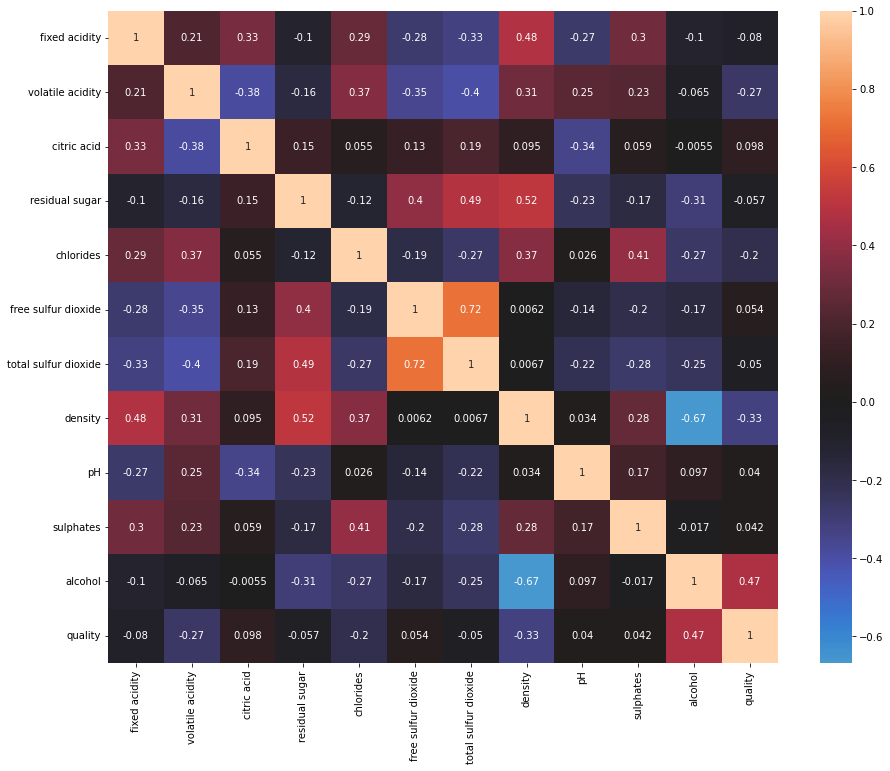

In [375]:
fig, ax = plt.subplots(1,1, figsize = (15, 12))
sns.heatmap(df.select_dtypes(exclude="object").corr(), annot = True, center = 0)

4. Based on the pairwise plots, which features appear to be highly correlated? Are there any features that do not appear to be correlated with any other features?
> * the most corelated features are `total sulfur dioxide` and `free sulfur dioxide`
> * `alcohol` seems to be the features has least corraltion with other features

<AxesSubplot:>

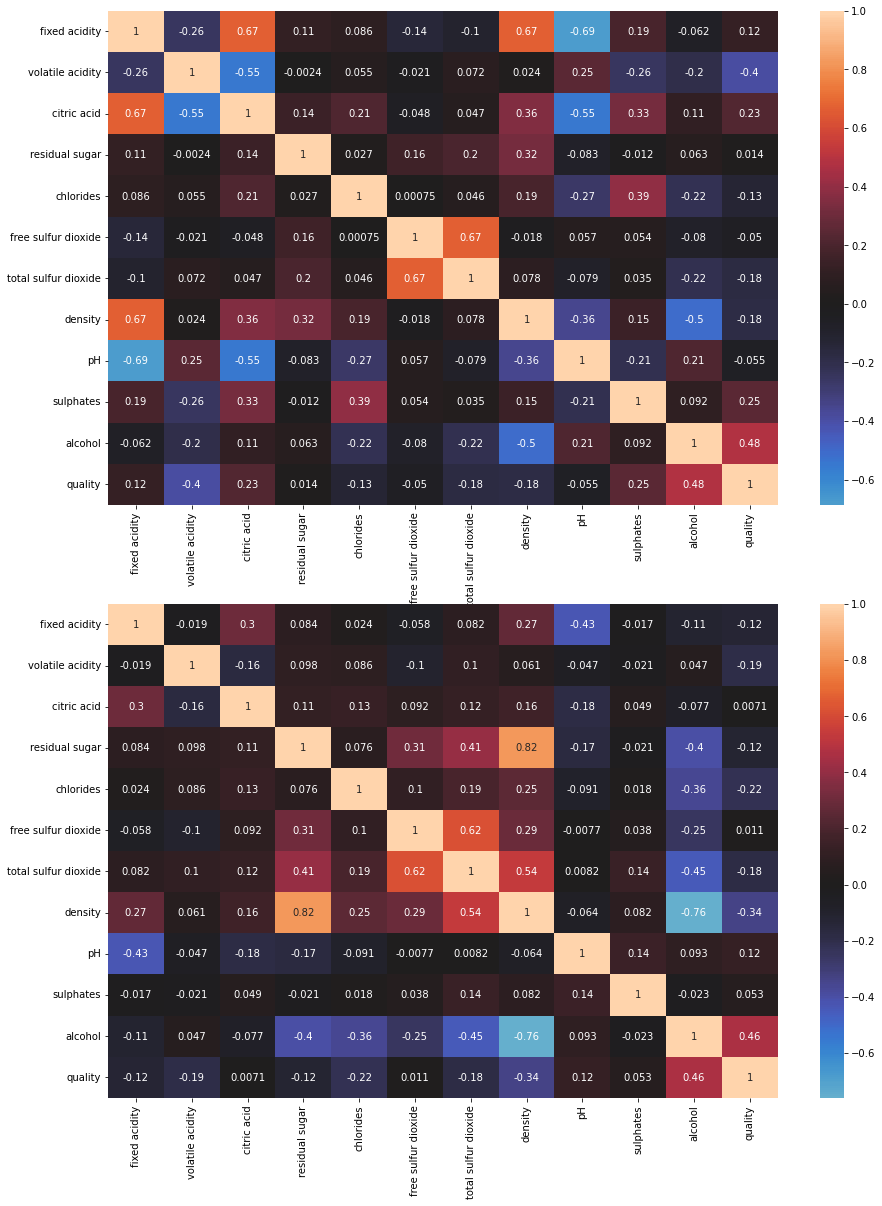

In [378]:
fig, axs = plt.subplots(2,1, figsize = (15, 20))
sns.heatmap(df[df["wine type"] == "red"].select_dtypes(exclude="object").corr(), 
            annot = True, center = 0, ax = axs[0])
sns.heatmap(df[df["wine type"] == "white"].select_dtypes(exclude="object").corr(), 
            annot = True, center = 0, ax = axs[1])

5. Based on the class-wise visualizations, are there any pairs of features that appear to be more correlated for certain wine types than for others?
> * for `red wine` the following features corraltion raise up
>    * `citric acid` and `fixed acidity`
>    * `density` and `fixed acidity`
>    * `PH` and `fixed acidity`
> * for `white wine` the following feature corralation raise up
>    * `density` and `alcohol`
>    * `density` and `residual sugar`

---

# 2 Forest Fires Dataset

### 2.1 Summary Statistics

In [379]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
forest_fire = pd.read_csv(url)

In [380]:
display(forest_fire.shape)
display(forest_fire.head(2))
display(forest_fire.tail(2))

(517, 13)

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.0
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.0

In [382]:
forest_fire.isna().sum().sum()

0

In [383]:
forest_fire.duplicated().sum()

4

In [387]:
# here are the duplicate value
forest_fire[forest_fire.duplicated(keep = False)]

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
52   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
99   3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
302  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00

In [388]:
forest_fire = forest_fire.drop_duplicates()

In [393]:
forest_numeric = forest_fire.select_dtypes(exclude = "object")            
summary_forest = forest_numeric.describe().T

In [394]:
summary_forest["variance"] = forest_numeric.var()

summary_forest["range"] = summary_forest["min"].map('[{:>,.2f}'.format) +\
                        ", " + summary_forest["max"].map('{:>6,.2f}]'.format)

summary_forest["count"] = summary_forest["count"].map(int)

summary_forest.iloc[:, 1:9] = summary_forest.iloc[:, 1:9].applymap('{:.3f}'.format)

In [395]:
summary_forest.iloc[:, [3,7,1,9,2,8,0,4,5,6]]

min       max     mean             range      std   variance  count  \
X      1.000     9.000    4.678    [1.00,   9.00]    2.320      5.383    513   
Y      2.000     9.000    4.300    [2.00,   9.00]    1.231      1.515    513   
FFMC  18.700    96.200   90.637   [18.70,  96.20]    5.541     30.702    513   
DMC    1.100   291.300  110.989    [1.10, 291.30]   64.191   4120.486    513   
DC     7.900   860.600  549.155    [7.90, 860.60]  247.725  61367.475    513   
ISI    0.000    56.100    9.024    [0.00,  56.10]    4.576     20.936    513   
temp   2.200    33.300   18.888    [2.20,  33.30]    5.828     33.967    513   
RH    15.000   100.000   44.349   [15.00, 100.00]   16.359    267.610    513   
wind   0.400     9.400    4.011    [0.40,   9.40]    1.797      3.228    513   
rain   0.000     6.400    0.022    [0.00,   6.40]    0.297      0.088    513   
area   0.000  1090.840   12.892  [0.00, 1,090.84]   63.893   4082.263    513   

          25%      50%      75%  
X       3.000    4.000    7.000  
Y       4.000    4.000    5.000  
FFMC   90.200   91.600   92.900  
DMC    68.600  108.300  142.400  
DC    440.900  664.500  713.900  
ISI     6.400    8.400   11.000  
temp   15.500   19.300   22.800  
RH     33.000   42.000   53.000  
wind    2.700    4.000    4.900  
rain    0.000    0.000    0.000  
area    0.000    0.540    6.570

### 2.2 Data Visualization

In [396]:
forest_fire.head(2)

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0

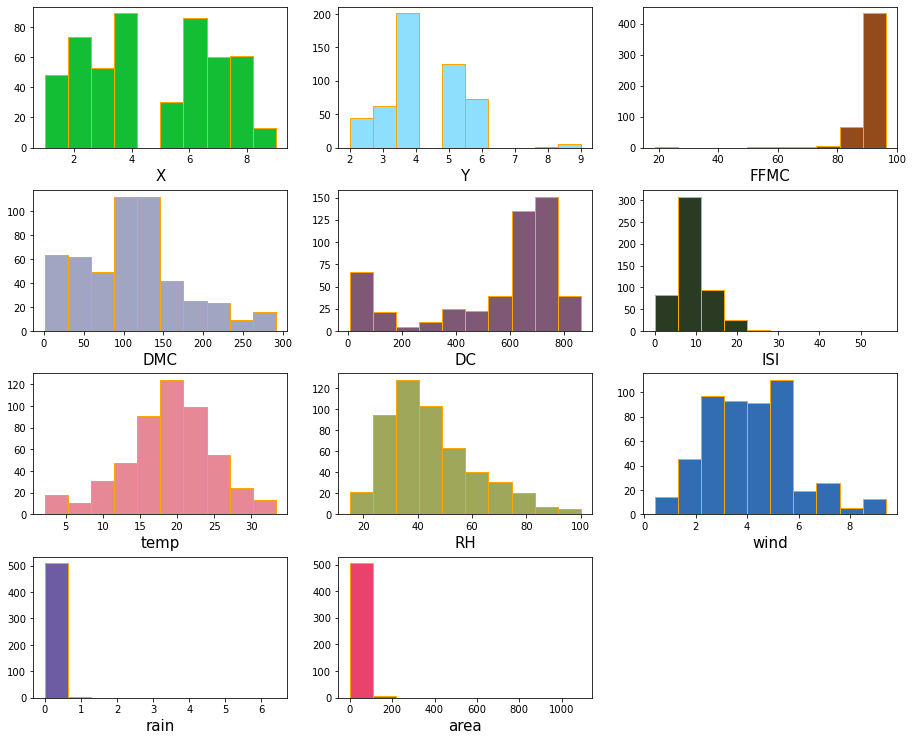

In [400]:
fig, axs = plt.subplots(4,3, figsize = (15,12))
plt.subplots_adjust(left=0.1,right=0.9, top=0.9, bottom=0.1, 
                    wspace=0.2, hspace=0.3) #location matters
#fig.tight_layout(pad = 3)
for i in range(len(forest_numeric.columns)):
    axs[i//3, i % 3].hist(forest_numeric[forest_numeric.columns[i]], edgecolor = "orange",
                          color = "#" + "".join(random.choices("123456789ABCDEF",k=6)))
    axs[i//3, i % 3].set_xlabel(forest_numeric.columns[i], fontsize = 15)
axs[3,2].set_visible(False)    
    

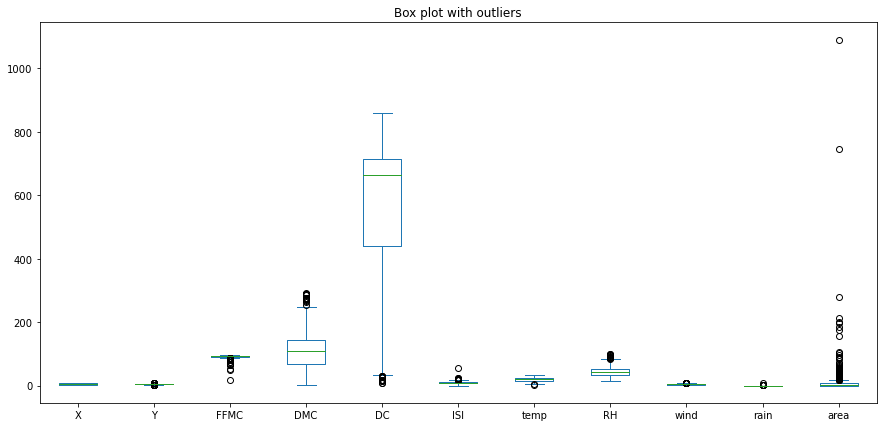

In [404]:
forest_fire.plot(kind = "box", figsize = (15,7), title = "Box plot with outliers")
plt.show()

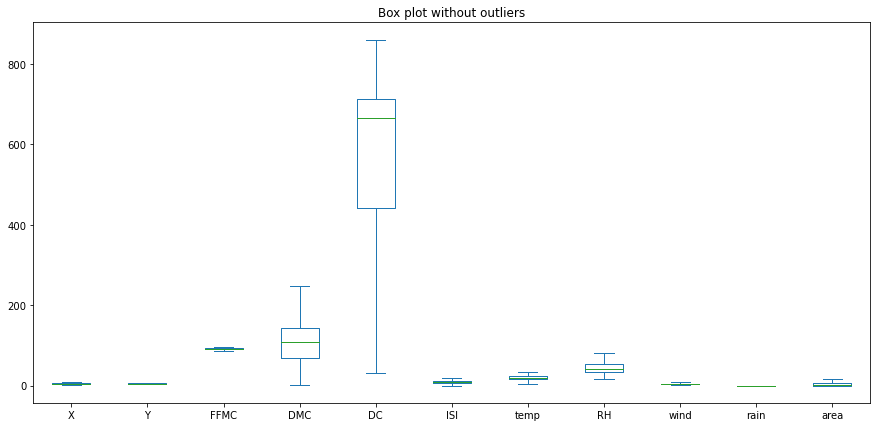

In [405]:
forest_fire.plot(kind = "box", figsize = (15,7), 
                 title = "Box plot without outliers",
                showfliers=False)
plt.show()

### 2.3 Conceptual Questions

Answer the following questions about the analysis you just performed. Include the answers to this questions as text content (using markdown or text cells on Jupyter notebook) in the same notebook file used for visualization.

1. From the boxplot without outliers, which features has a significantly different distribu- tion from others? Why?
> * `DC` has the significantly different distributions with others, not only because it's data range is far more large than the others but the median value is very close to the 75% percentile
> * please also note that `X` and `area` features are also different than the others because it's median is much lower compare to others

2. What does the outlier in the features mean? If you remove the outliers from the dataset, what problems might arise?
> * outlier means the values is either greater than 75 percentile + 1.5 IQR, or lower than 25 percentile - 1.5 IQR
> * dropping outliers are not always correct because dropping outlier may affect the following statistical measurment
>   * mean
>   * standard deviation
>   * median
>   * inter quartile range
> * please also note that outliers are not always completely wrong and for a small dataset dropping outlier may affect your analysis, once there are too many outliers it is not a good idea to drop it

3. Create a histogram for only FFMC after removing all the values outside of range [88, 96].

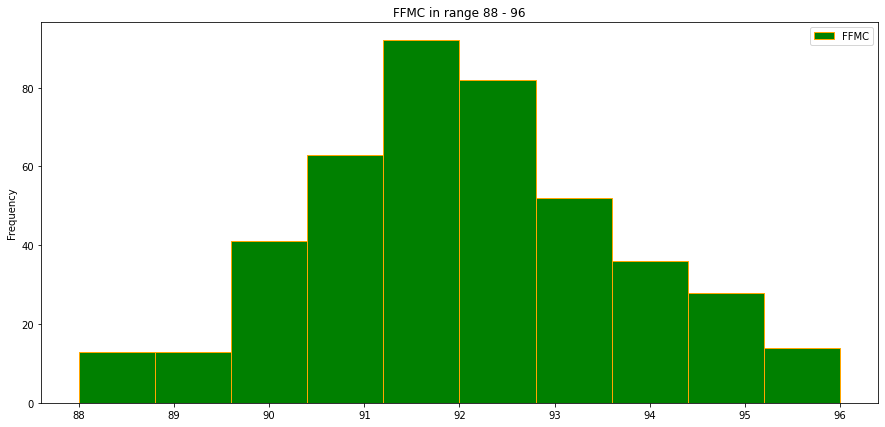

In [415]:
FFMC = forest_fire[["FFMC"]]
FFMC_range = FFMC[(FFMC["FFMC"] >= 88) & (FFMC["FFMC"] <= 96)]
FFMC_range.plot(kind = "hist", figsize = (15, 7), color = "green",
                edgecolor = "orange", title = "FFMC in range 88 - 96")
plt.show()

4. What distribution does the new histogram follow?
> nearly normal distribution